In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

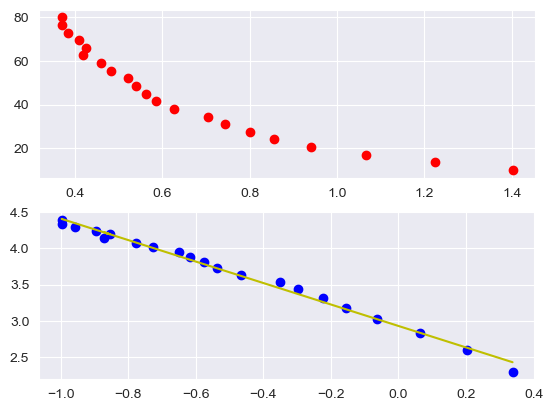

a = [[-1.47630727]]
b = [2.93060269]


In [105]:
values = np.full((21, 1), 0, dtype=float)
logvalues = np.full((21, 1), 0, dtype=float)
fehler = np.full((21, 1), 0, dtype=float)
dists = np.full((21, 1), 0, dtype=float)

for i in range(0, 21): dists[i] = i * 3.5 + 10
fig, splt = plt.subplots(2)
for i in range(0,21):
    p = f"./messung/kennlinie/abstand-{i * 3.5 + 10}.csv"
    m = pd.read_csv(p, sep=';', decimal=',', skiprows=2)
    n = m.to_numpy().transpose()[1]
    values[i] = np.mean(n)
    logvalues[i] = np.log(np.mean(n))
splt[0].scatter(values, dists, color='r')
splt[1].scatter(logvalues,np.log(dists), color='b')
lr = lm.LinearRegression()
lr.fit(logvalues, np.log(dists))
a = lr.coef_
b = lr.intercept_
splt[1].plot(logvalues, a * logvalues + b, color='y')
plt.show()
print("a = " + str(a))
print("b = " + str(b))



## Funktion umgerechnet auf die ursprünglichen Daten


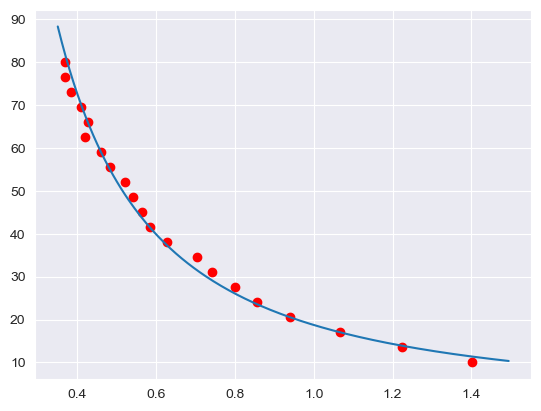

In [106]:
xr = np.arange(0.35,1.5, 0.005)
def f(x): return np.exp(b) * x ** a
xf = f(xr)
plt.plot(xr, xf.transpose())
plt.scatter(values, dists, color='r')
plt.show()


# Din-A4 Blatt Größe und Fehler berechnen

In [146]:
dinA4breite = pd.read_csv("./messung/papier/abstand-a4-breite.csv", sep=';', decimal=',', skiprows=2).to_numpy().transpose()[1]
dinA4hoehe = pd.read_csv("./messung/papier/abstand-a4-höhe.csv", sep=';', decimal=',', skiprows=2).to_numpy().transpose()[1]

def ff(val, error): return np.exp(b) * abs(a) * val **(a-1) * error
for i in range(0,21):
    p = f"./messung/kennlinie/abstand-{i * 3.5 + 10}.csv"
    m = pd.read_csv(p, sep=';', decimal=',', skiprows=2).to_numpy().transpose()[1]
    mw = np.mean(m)
    fehler[i] = np.std(m, ddof=1)
fehlerh = np.std(dinA4hoehe, ddof=1)
fehlerb = np.std(dinA4breite, ddof=1)
hoeheMean = np.mean(dinA4hoehe)
breiteMean = np.mean(dinA4breite)
print("Abweichung von 68.26%: " + str(hoeheMean) + " ± " + str(fehlerh) + " [V]")
print("Abweichung von 95%: " + str(hoeheMean) + " ± " + str(1.96 * fehlerh) + " [V]")

print("Höhe-Abweichung von 68.26%: " + str(f(hoeheMean)) + " ± " + str(ff(hoeheMean, fehlerh)) + " [cm]")
print("Breite-Abweichung von 68.26%: " + str(f(breiteMean)) + " ± " + str(ff(breiteMean, fehlerb)) + " [cm]")


Abweichung von 68.26%: 0.7601072110454776 ± 0.022549383767884287 [V]
Abweichung von 95%: 0.7601072110454776 ± 0.0441967921850532 [V]
Höhe-Abweichung von 68.26%: [[28.09376207]] ± [[1.23040046]] [cm]
Breite-Abweichung von 68.26%: [[20.65600316]] ± [[0.65038466]] [cm]


# DIN-A4 Fläche berechnen

In [148]:
flaeche = hoeheMean * breiteMean
flaecheF = np.sqrt((ff(hoeheMean, fehlerh)/hoeheMean)**2 + (ff(breiteMean, fehlerb)/breiteMean)**2)
print(str(flaeche) + " ± " + str(flaecheF))

0.7115757201931375 ± [[1.76151091]]
